## Downloading the dataset through Kaggle API

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d deepcontractor/car-price-prediction-challenge

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge
License(s): CC0-1.0
  0% 0.00/429k [00:00<?, ?B/s]
100% 429k/429k [00:00<00:00, 690MB/s]


In [5]:
!unzip /content/car-price-prediction-challenge.zip

Archive:  /content/car-price-prediction-challenge.zip
  inflating: car_price_prediction.csv  


## Loading the dataset through pandas library

In [6]:
import pandas as pd
df = pd.read_csv('/content/car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


| Column Name        | Description                                       | Example Value            | Data Type                | Notes / Processing Needed                           |
| ------------------ | ------------------------------------------------- | ------------------------ | ------------------------ | --------------------------------------------------- |
| `ID`               | Unique identifier for each record                 | `45654403`               | Integer (Nominal)        | Drop (not useful for prediction)                    |
| `Price`            | Selling price of the car                          | `13328`                  | Numerical                | ✅ Target variable (regression)                      |
| `Levy`             | Import tax or additional fee (can be missing `-`) | `1399`, `-`              | Numerical (some missing) | Replace `-` with 0 or median                        |
| `Manufacturer`     | Car brand name                                    | `LEXUS`                  | Categorical              | Label Encoding or One-Hot Encoding                  |
| `Model`            | Specific model of the car                         | `RX 450`                 | Categorical              | Label Encode or drop if high cardinality            |
| `Prod. year`       | Production year of the car                        | `2010`                   | Numerical                | Convert to car age: `current_year - year`           |
| `Category`         | Car body type                                     | `Jeep`, `Hatchback`      | Categorical              | Label Encode                                        |
| `Leather interior` | Whether the car has leather seats                 | `Yes`, `No`              | Binary                   | Map to 1 (Yes), 0 (No)                              |
| `Fuel type`        | Type of fuel used                                 | `Hybrid`, `Petrol`       | Categorical              | Label Encode                                        |
| `Engine volume`    | Engine size in liters                             | `3.5`, `1.3`             | Numerical                | May need to extract numeric part if formatted oddly |
| `Mileage`          | Distance driven, often with `km` suffix           | `186005 km`              | String → Numeric         | Strip `km` and convert to integer                   |
| `Cylinders`        | Number of cylinders in the engine                 | `4.0`, `6.0`             | Numerical                | Convert to float or integer                         |
| `Gear box type`    | Type of transmission                              | `Automatic`, `Tiptronic` | Categorical              | Label Encode                                        |
| `Drive wheels`     | Drivetrain configuration                          | `4x4`, `Front`           | Categorical              | Label Encode                                        |
| `Doors`            | Number of doors (may have weird value `04-May`)   | `04-May`                 | String → Numeric         | Clean and convert to integer                        |
| `Wheel`            | Steering wheel position                           | `Left wheel`             | Categorical              | Label Encode                                        |
| `Color`            | Exterior color of the car                         | `Black`, `Silver`        | Categorical              | Label Encode                                        |
| `Airbags`          | Number of airbags                                 | `12`, `8`                | Numerical                | Already numeric                                     |


In [7]:
df.shape

(19237, 18)

Here, we can see that the dataset contains 19,237 rows and 18 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

It appears that there are no missing values in the dataset. But some columns have wrong data types

In [9]:
df.drop(['ID'], axis=1, inplace=True)

Drop the ID column as it holds no significance

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

Changing the display to readable format

In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [12]:
df.describe(include='all')

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,19237.00,19237,19237,19237,19237.00,19237,19237,19237,19237,19237,19237.00,19237,19237,19237,19237,19237,19237.00
unique,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN
top,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,04-May,Left wheel,Black,NaN
freq,NaN,5819,3769,1083,NaN,8736,13954,10150,3916,721,NaN,13514,12874,18332,17753,5033,NaN
mean,18555.93,NaN,NaN,NaN,2010.91,NaN,NaN,NaN,NaN,NaN,4.58,NaN,NaN,NaN,NaN,NaN,6.58
std,190581.27,NaN,NaN,NaN,5.67,NaN,NaN,NaN,NaN,NaN,1.20,NaN,NaN,NaN,NaN,NaN,4.32
min,1.00,NaN,NaN,NaN,1939.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00
25%,5331.00,NaN,NaN,NaN,2009.00,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,4.00
50%,13172.00,NaN,NaN,NaN,2012.00,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,6.00
75%,22075.00,NaN,NaN,NaN,2015.00,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,12.00


Here, we could see that some columns have extreme outliers and invalid values

In [13]:
df['Levy'].value_counts()

,count
Levy,
-,5819
765,486
891,461
639,410
640,405
...,...
676,1
1678,1
1369,1


Replace (-) values with 0

In [14]:
df['Levy'] = df['Levy'].replace('-', 0).astype(int)

In [15]:
df['Levy'].value_counts()

,count
Levy,
0,5819
765,486
891,461
639,410
640,405
...,...
676,1
1678,1
1369,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

## Feature Engineering - Creating a new column Car Age

In [17]:
df['Prod. year'].value_counts()

,count
Prod. year,
2012,2155
2014,2124
2013,1963
2011,1612
2015,1549
2010,1483
2016,1476
2017,959
2008,737


In [18]:
df['Car Age'] = 2025 - df['Prod. year']
df.drop(columns=['Prod. year'], inplace=True)

In [19]:
df['Car Age'].value_counts()

,count
Car Age,
13,2155
11,2124
12,1963
14,1612
10,1549
15,1483
9,1476
8,959
17,737


In [20]:
df['Engine volume'].value_counts()

,count
Engine volume,
2,3916
2.5,2277
1.8,1760
1.6,1462
1.5,1321
...,...
5.4 Turbo,1
0.3 Turbo,1
5.2,1


Let's clean the Turbo values

In [21]:
df['Engine volume'] = df['Engine volume'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [22]:
df['Engine volume'].value_counts()

,count
Engine volume,
2.00,4324
2.50,2370
1.80,1937
1.60,1578
1.50,1393
...,...
6.80,1
3.10,1
7.30,1


Mileage has 'km', replace it

In [23]:
df['Mileage'].value_counts()

,count
Mileage,
0 km,721
200000 km,183
150000 km,161
160000 km,120
100000 km,119
...,...
82141 km,1
47522 km,1
2150 km,1


In [24]:
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '').astype(int)

In [25]:
df['Mileage'].value_counts()

,count
Mileage,
0,721
200000,183
150000,161
160000,120
100000,119
...,...
82141,1
47522,1
2150,1


In [26]:
df.describe(include='all')

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Age
count,19237.00,19237.00,19237,19237,19237,19237,19237,19237.00,19237.00,19237.00,19237,19237,19237,19237,19237,19237.00,19237.00
unique,NaN,NaN,65,1590,11,2,7,NaN,NaN,NaN,4,3,3,2,16,NaN,NaN
top,NaN,NaN,HYUNDAI,Prius,Sedan,Yes,Petrol,NaN,NaN,NaN,Automatic,Front,04-May,Left wheel,Black,NaN,NaN
freq,NaN,NaN,3769,1083,8736,13954,10150,NaN,NaN,NaN,13514,12874,18332,17753,5033,NaN,NaN
mean,18555.93,632.53,NaN,NaN,NaN,NaN,NaN,2.31,1532235.69,4.58,NaN,NaN,NaN,NaN,NaN,6.58,14.09
std,190581.27,567.72,NaN,NaN,NaN,NaN,NaN,0.88,48403869.38,1.20,NaN,NaN,NaN,NaN,NaN,4.32,5.67
min,1.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,0.00,5.00
25%,5331.00,0.00,NaN,NaN,NaN,NaN,NaN,1.80,70139.00,4.00,NaN,NaN,NaN,NaN,NaN,4.00,10.00
50%,13172.00,642.00,NaN,NaN,NaN,NaN,NaN,2.00,126000.00,4.00,NaN,NaN,NaN,NaN,NaN,6.00,13.00
75%,22075.00,917.00,NaN,NaN,NaN,NaN,NaN,2.50,188888.00,4.00,NaN,NaN,NaN,NaN,NaN,12.00,16.00


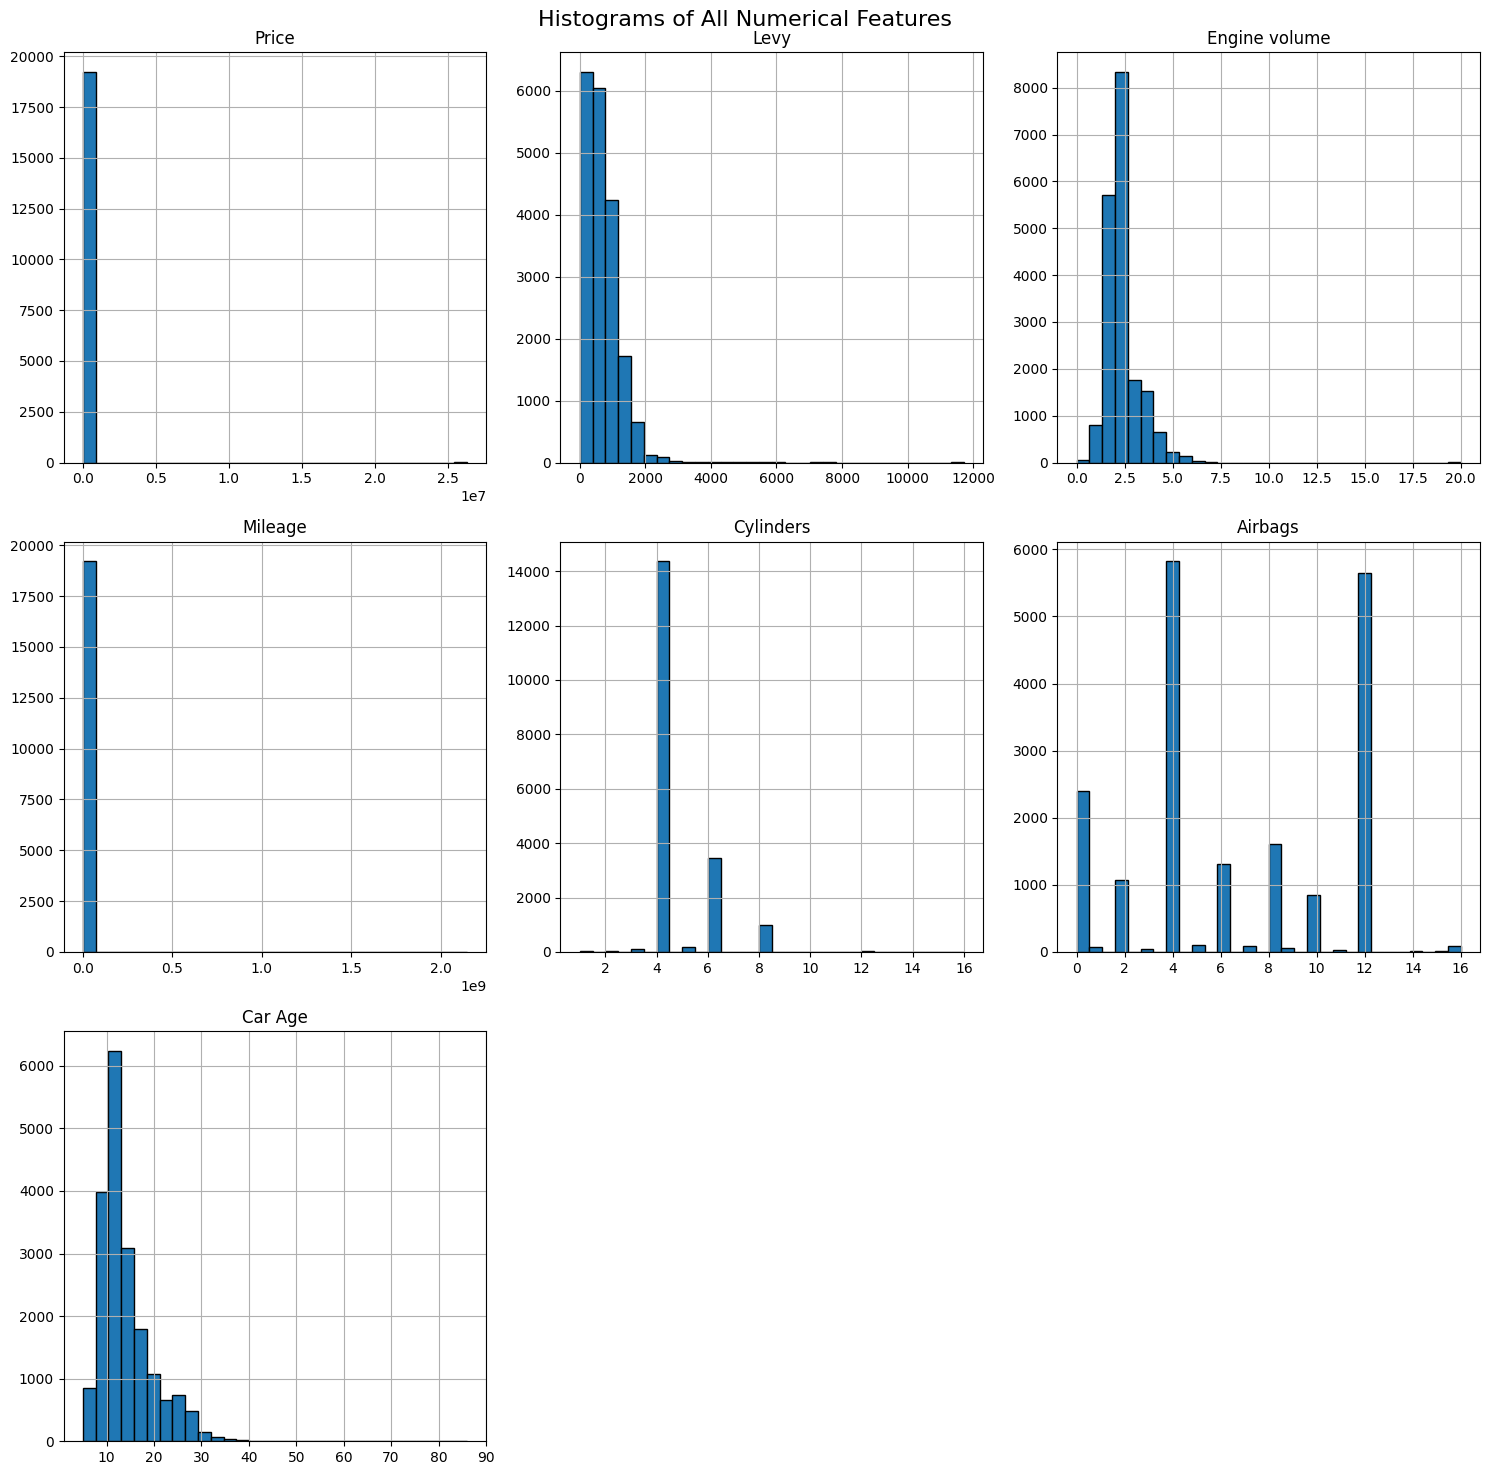

In [27]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 15), bins=30, edgecolor='black')
plt.suptitle('Histograms of All Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

Price and other columns have skewness

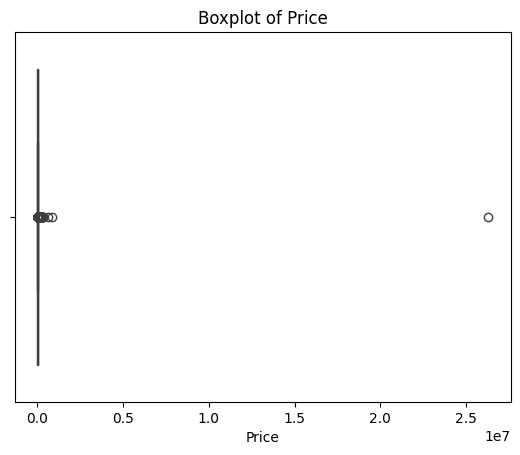

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Price'])  # or df['Price_log']
plt.title("Boxplot of Price")
plt.show()

Price column has outliers

## Handling Outliers using IQR

In [29]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [30]:
lower_bound, upper_bound

(np.float64(-19785.0), np.float64(47191.0))

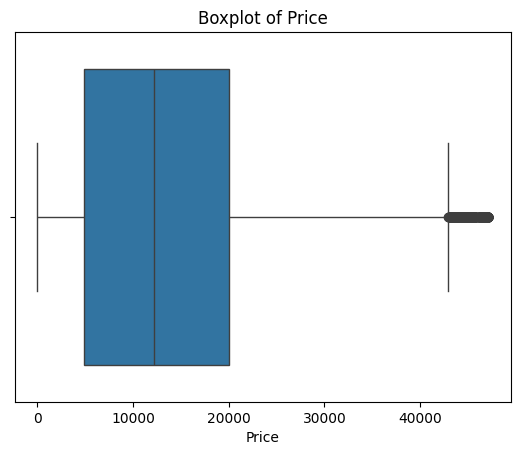

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Price'])  # or df['Price_log']
plt.title("Boxplot of Price")
plt.show()

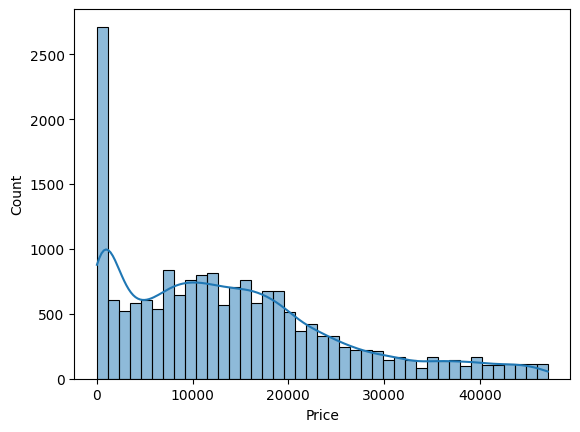

In [32]:
sns.histplot(data=df, x='Price', kde=True)
plt.show()

In [33]:
df.describe()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Car Age
count,18164.00,18164.00,18164.00,18164.00,18164.00,18164.00,18164.00
mean,14024.92,621.20,2.28,1617931.84,4.55,6.59,14.34
std,11377.78,565.00,0.86,49811787.39,1.16,4.32,5.62
min,1.00,0.00,0.00,0.00,1.00,0.00,5.00
25%,4861.00,0.00,1.80,74000.00,4.00,4.00,11.00
50%,12231.00,640.00,2.00,130000.00,4.00,6.00,13.00
75%,20071.00,891.00,2.50,190875.00,4.00,12.00,16.00
max,47120.00,11714.00,20.00,2147483647.00,16.00,16.00,86.00


Even after handling the outliers, we could see that price column has value '1', which can't be valid

## Handling extreme values using zscore & log transform

In [34]:
from scipy.stats import zscore
import numpy as np
df['log_price'] = np.log1p(df['Price'])
df['z'] = zscore(df['log_price'])

df = df[df['z'].abs() < 3]  # Keep within 3 standard deviations
df.drop(['z'], axis=1, inplace=True)

/tmp/ipython-input-34-197946748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['z'], axis=1, inplace=True)


In [35]:
df.describe()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Car Age,log_price
count,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00
mean,14247.89,628.95,2.29,1458107.88,4.55,6.61,14.30,8.99
std,11329.11,564.16,0.86,46843070.95,1.16,4.33,5.63,1.39
min,78.00,0.00,0.00,0.00,1.00,0.00,5.00,4.37
25%,5175.00,0.00,1.80,74429.00,4.00,4.00,11.00,8.55
50%,12544.00,642.00,2.00,130000.00,4.00,6.00,13.00,9.44
75%,20359.50,892.00,2.50,191373.00,4.00,12.00,16.00,9.92
max,47120.00,11714.00,20.00,2147483647.00,16.00,16.00,86.00,10.76


Now, the price values seems valid

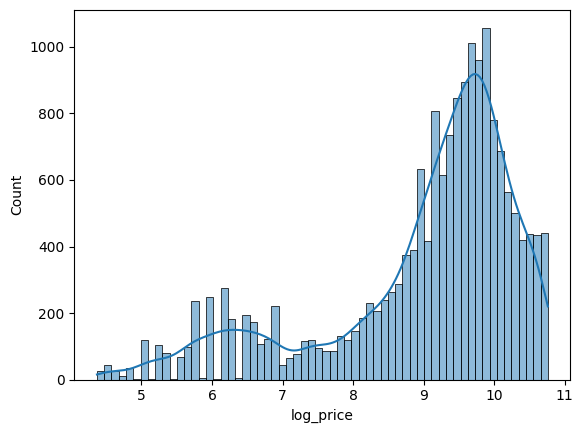

In [36]:
sns.histplot(data=df, x='log_price', kde=True)
plt.show()

## Now the price column looks better

## Heatmap (Correlation of numerical cols)

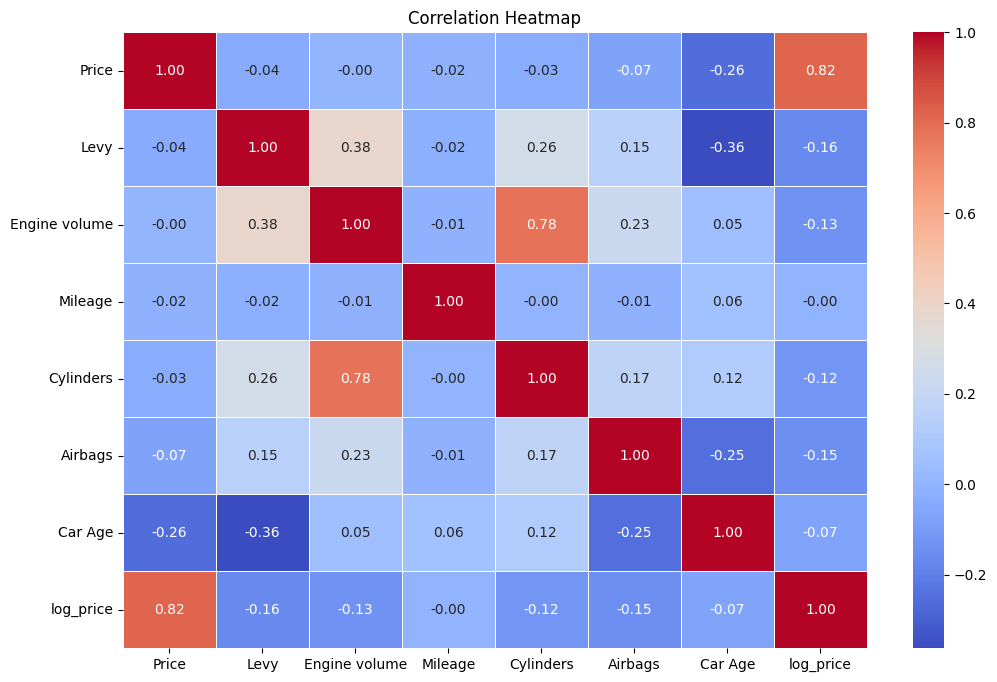

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

It seems that no numerical columns have that impact on the Price column

## VIF

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Drop target column (e.g., 'Price' or 'log_price') and non-numeric columns
X = df[numerical_cols].drop(columns=['Price', 'log_price'], errors='ignore')
X = X.dropna()  # VIF requires no missing values
X = add_constant(X)  # Add intercept for VIF

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         Feature   VIF
0          const 25.24
1           Levy  1.42
2  Engine volume  2.85
3        Mileage  1.00
4      Cylinders  2.59
5        Airbags  1.14
6        Car Age  1.32


All columns have VIF < 5, which means no multicollinearity

## Correlation using Cramer's V (For Categorical columns)

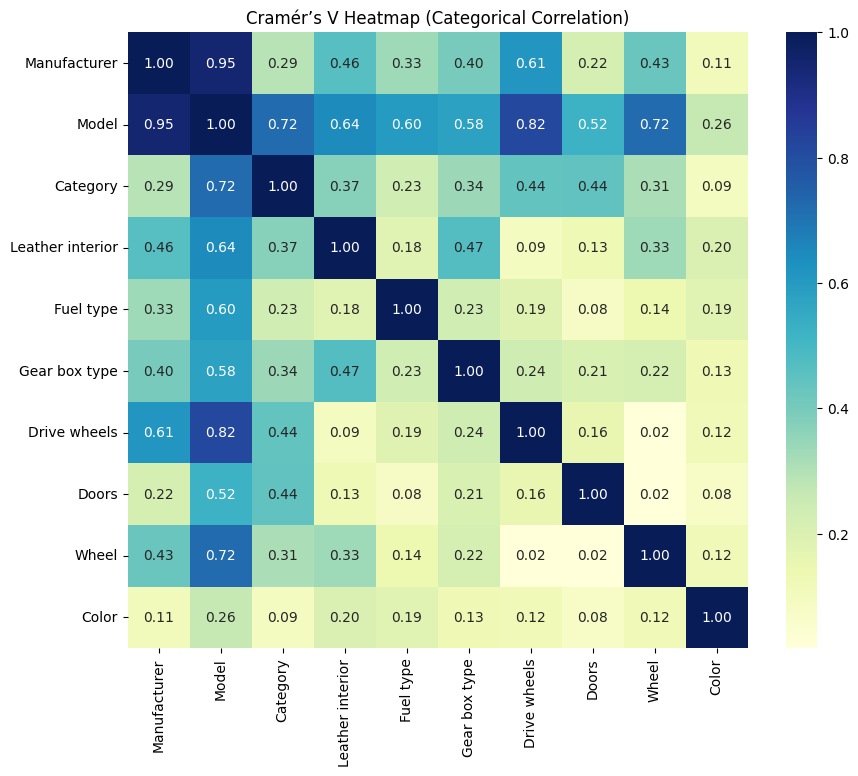

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to calculate Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Compute matrix
cat_cols = df.select_dtypes(include='object').columns
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to float and plot
cramers_matrix = cramers_matrix.astype(float)
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Cramér’s V Heatmap (Categorical Correlation)")
plt.show()

Here, the columns have multicollinerity between them like Manufacturer ~ Model, Model ~ Drive wheels, Model ~ Wheel. Model has coorelation with most of the columns - will drop it later

In [40]:
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency

# Example: bin log_price into 3 categories
df['log_price_bin'] = pd.qcut(df['log_price'], q=3, labels=["Low", "Medium", "High"])

# Chi-square test between each categorical variable and binned target
for col in cat_cols:
    table = pd.crosstab(df[col], df['log_price_bin'])
    stat, p, dof, expected = chi2_contingency(table)
    print(f"{col} vs log_price_bin: p-value = {p:.4f}")

Manufacturer vs log_price_bin: p-value = 0.0000
Model vs log_price_bin: p-value = 0.0000
Category vs log_price_bin: p-value = 0.0000
Leather interior vs log_price_bin: p-value = 0.0000
Fuel type vs log_price_bin: p-value = 0.0000
Gear box type vs log_price_bin: p-value = 0.0000
Drive wheels vs log_price_bin: p-value = 0.0000
Doors vs log_price_bin: p-value = 0.0000
Wheel vs log_price_bin: p-value = 0.0000
Color vs log_price_bin: p-value = 0.0000


## Levy has many missing values - handle it

In [41]:
# Step 1: Replace 0 with NaN
df['Levy'] = df['Levy'].replace(0, np.nan)

# Step 2: Group-based median imputation
df['Levy'] = df.groupby(['Manufacturer', 'Fuel type'])['Levy'].transform(lambda x: x.fillna(x.median()))

# Step 3: Fallback imputation for remaining NaNs
df['Levy'] = df['Levy'].fillna(df['Levy'].median())

In [42]:
df.describe()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Car Age,log_price
count,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00
mean,14247.89,916.09,2.29,1458107.88,4.55,6.61,14.30,8.99
std,11329.11,522.41,0.86,46843070.95,1.16,4.33,5.63,1.39
min,78.00,87.00,0.00,0.00,1.00,0.00,5.00,4.37
25%,5175.00,642.00,1.80,74429.00,4.00,4.00,11.00,8.55
50%,12544.00,781.00,2.00,130000.00,4.00,6.00,13.00,9.44
75%,20359.50,1055.00,2.50,191373.00,4.00,12.00,16.00,9.92
max,47120.00,11714.00,20.00,2147483647.00,16.00,16.00,86.00,10.76


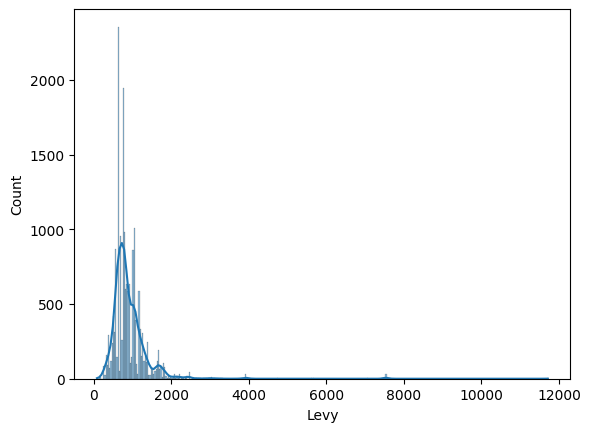

In [43]:
sns.histplot(data=df, x='Levy', kde=True)
plt.show()

## Log Transform Levy

In [44]:
df['log_levy'] = np.log1p(df['Levy'])

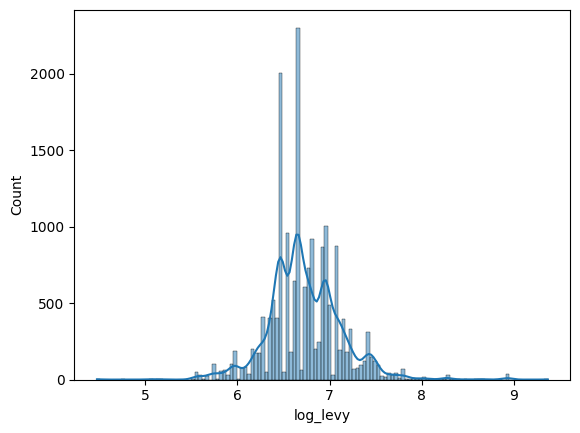

In [45]:
sns.histplot(data=df, x='log_levy', kde=True)
plt.show()

In [46]:
df.describe()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Car Age,log_price,log_levy
count,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00
mean,14247.89,916.09,2.29,1458107.88,4.55,6.61,14.30,8.99,6.73
std,11329.11,522.41,0.86,46843070.95,1.16,4.33,5.63,1.39,0.40
min,78.00,87.00,0.00,0.00,1.00,0.00,5.00,4.37,4.48
25%,5175.00,642.00,1.80,74429.00,4.00,4.00,11.00,8.55,6.47
50%,12544.00,781.00,2.00,130000.00,4.00,6.00,13.00,9.44,6.66
75%,20359.50,1055.00,2.50,191373.00,4.00,12.00,16.00,9.92,6.96
max,47120.00,11714.00,20.00,2147483647.00,16.00,16.00,86.00,10.76,9.37


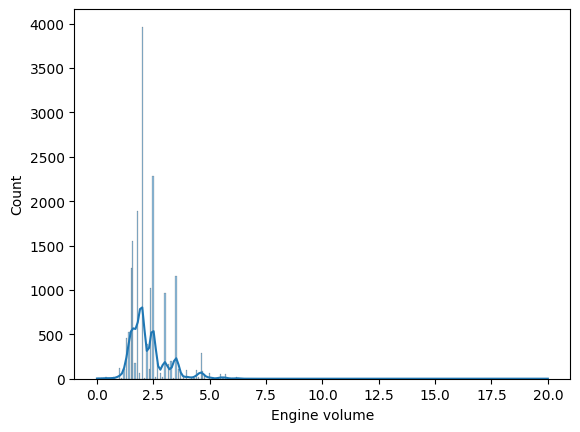

In [47]:
sns.histplot(data=df, x='Engine volume', kde=True)
plt.show()

## Log Transform Engine volume

In [48]:
df['log_engine_volume'] = np.log1p(df['Engine volume'])

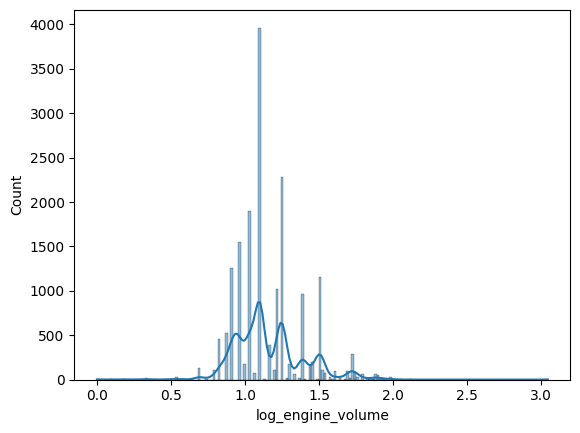

In [49]:
sns.histplot(data=df, x='log_engine_volume', kde=True)
plt.show()

In [50]:
df.describe()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Car Age,log_price,log_levy,log_engine_volume
count,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00,17879.00
mean,14247.89,916.09,2.29,1458107.88,4.55,6.61,14.30,8.99,6.73,1.16
std,11329.11,522.41,0.86,46843070.95,1.16,4.33,5.63,1.39,0.40,0.23
min,78.00,87.00,0.00,0.00,1.00,0.00,5.00,4.37,4.48,0.00
25%,5175.00,642.00,1.80,74429.00,4.00,4.00,11.00,8.55,6.47,1.03
50%,12544.00,781.00,2.00,130000.00,4.00,6.00,13.00,9.44,6.66,1.10
75%,20359.50,1055.00,2.50,191373.00,4.00,12.00,16.00,9.92,6.96,1.25
max,47120.00,11714.00,20.00,2147483647.00,16.00,16.00,86.00,10.76,9.37,3.04


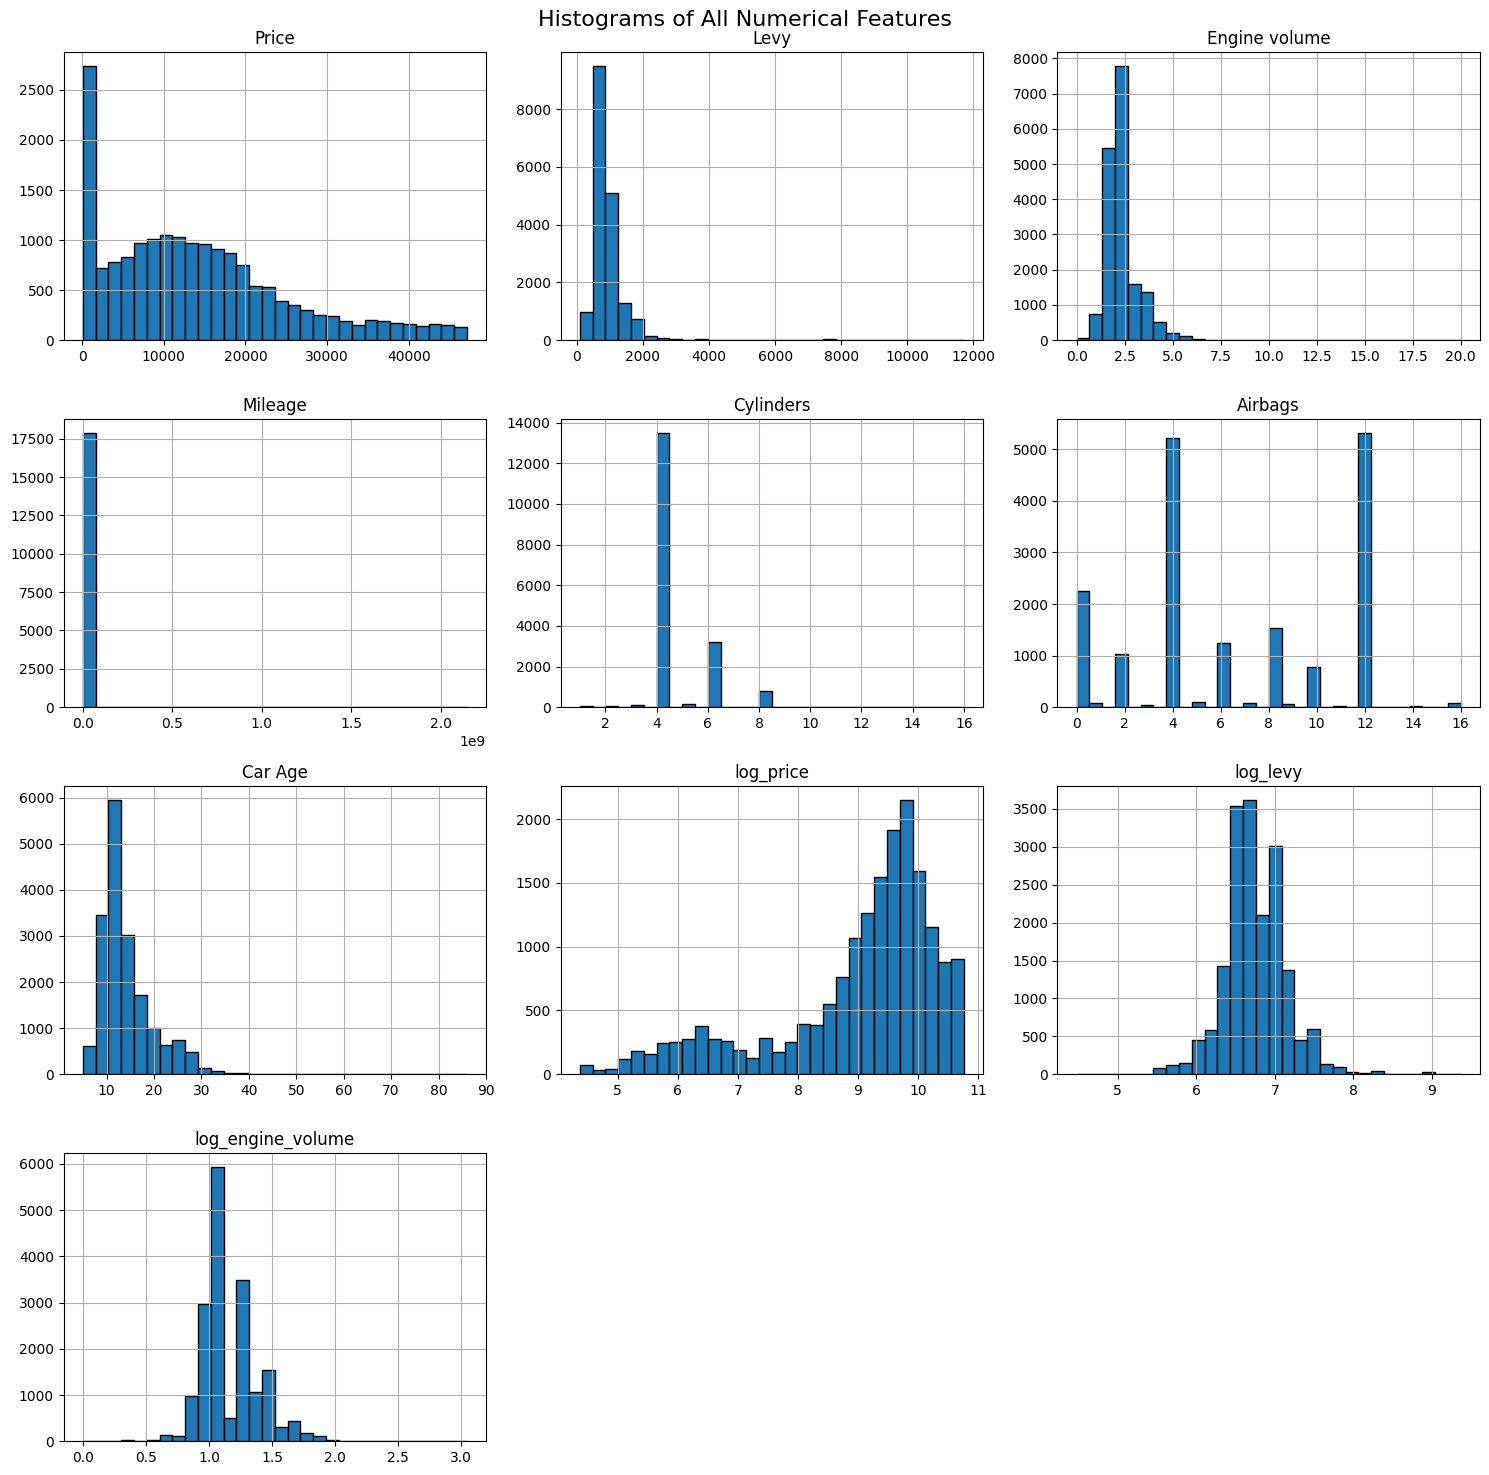

In [51]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 15), bins=30, edgecolor='black')
plt.suptitle('Histograms of All Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

## Now the distribution looks even

## Mileage has 0 values, let's drop it

In [52]:
df['Mileage'] = df['Mileage'].replace(0, np.nan)
df = df[df['Mileage'].notna()]

In [53]:
df.describe()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Car Age,log_price,log_levy,log_engine_volume
count,17220.00,17220.00,17220.00,17220.00,17220.00,17220.00,17220.00,17220.00,17220.00,17220.00
mean,14486.52,912.36,2.29,1513908.87,4.54,6.65,14.16,9.02,6.73,1.16
std,11375.64,519.05,0.86,47730151.18,1.15,4.30,5.47,1.39,0.40,0.23
min,78.00,87.00,0.00,13.00,1.00,0.00,5.00,4.37,4.48,0.00
25%,5488.00,642.00,1.80,81122.50,4.00,4.00,11.00,8.61,6.47,1.03
50%,12585.00,781.00,2.00,133759.50,4.00,6.00,13.00,9.44,6.66,1.10
75%,20385.00,1055.00,2.50,195200.00,4.00,12.00,16.00,9.92,6.96,1.25
max,47120.00,11714.00,20.00,2147483647.00,16.00,16.00,86.00,10.76,9.37,3.04


In [54]:
# IQR method
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Option 1: Remove
df = df[df['Mileage'] <= upper_bound]

# Option 2: Cap
df['Mileage'] = np.where(df['Mileage'] > upper_bound, upper_bound, df['Mileage'])

/tmp/ipython-input-54-1773604334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = np.where(df['Mileage'] > upper_bound, upper_bound, df['Mileage'])


In [55]:
df.describe()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Car Age,log_price,log_levy,log_engine_volume
count,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00
mean,14709.77,911.89,2.29,137898.10,4.55,6.66,14.13,9.03,6.73,1.16
std,11460.97,519.21,0.86,78240.96,1.16,4.31,5.41,1.39,0.40,0.23
min,78.00,87.00,0.00,13.00,1.00,0.00,5.00,4.37,4.48,0.00
25%,5645.00,642.00,1.80,79000.00,4.00,4.00,11.00,8.64,6.47,1.03
50%,13172.00,781.00,2.00,130000.00,4.00,6.00,13.00,9.49,6.66,1.10
75%,20852.75,1055.00,2.50,186449.50,4.00,12.00,16.00,9.95,6.96,1.25
max,47120.00,11714.00,20.00,365810.00,16.00,16.00,86.00,10.76,9.37,3.04


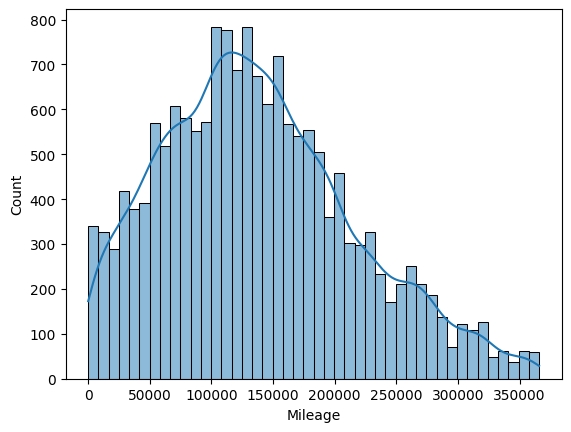

In [56]:
sns.histplot(data=df, x='Mileage', kde=True)
plt.show()

In [57]:
df.describe()

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Car Age,log_price,log_levy,log_engine_volume
count,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00
mean,14709.77,911.89,2.29,137898.10,4.55,6.66,14.13,9.03,6.73,1.16
std,11460.97,519.21,0.86,78240.96,1.16,4.31,5.41,1.39,0.40,0.23
min,78.00,87.00,0.00,13.00,1.00,0.00,5.00,4.37,4.48,0.00
25%,5645.00,642.00,1.80,79000.00,4.00,4.00,11.00,8.64,6.47,1.03
50%,13172.00,781.00,2.00,130000.00,4.00,6.00,13.00,9.49,6.66,1.10
75%,20852.75,1055.00,2.50,186449.50,4.00,12.00,16.00,9.95,6.96,1.25
max,47120.00,11714.00,20.00,365810.00,16.00,16.00,86.00,10.76,9.37,3.04


## Drop the columns after log transform

In [58]:
df.drop(['Price', 'Levy', 'Engine volume'], axis=1, inplace=True)

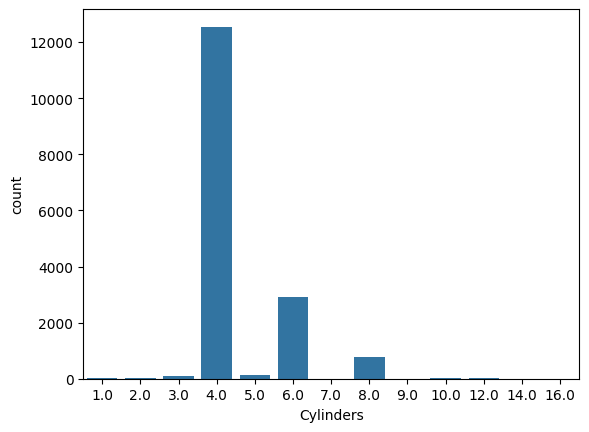

In [59]:
sns.countplot(data=df, x='Cylinders')
plt.show()

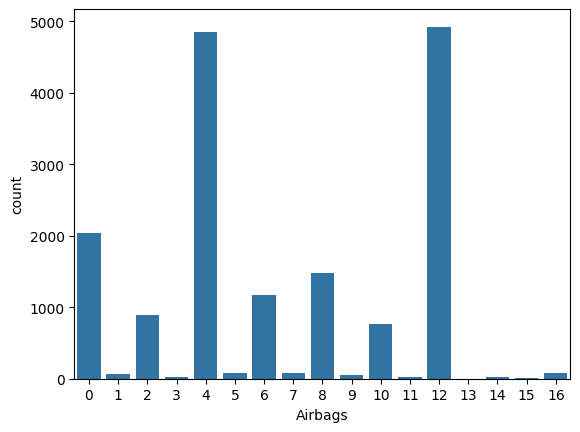

In [60]:
sns.countplot(data=df, x='Airbags')
plt.show()

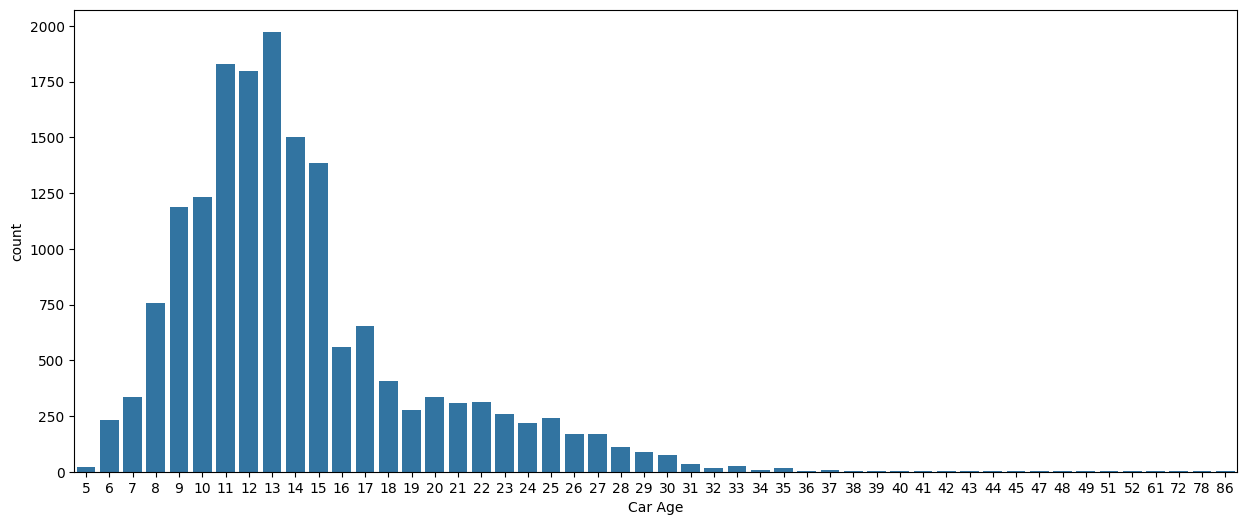

In [61]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Car Age')
plt.show()

In [62]:
df.describe(include='all')

,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Age,log_price,log_price_bin,log_levy,log_engine_volume
count,16582,16582,16582,16582,16582,16582.00,16582.00,16582,16582,16582,16582,16582,16582.00,16582.00,16582.00,16582,16582.00,16582.00
unique,60,1453,11,2,7,NaN,NaN,4,3,3,2,16,NaN,NaN,NaN,3,NaN,NaN
top,TOYOTA,Elantra,Sedan,Yes,Petrol,NaN,NaN,Automatic,Front,04-May,Left wheel,Black,NaN,NaN,NaN,High,NaN,NaN
freq,3179,897,7608,11966,8837,NaN,NaN,11719,11258,15809,15308,4306,NaN,NaN,NaN,5787,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,137898.10,4.55,NaN,NaN,NaN,NaN,NaN,6.66,14.13,9.03,NaN,6.73,1.16
std,NaN,NaN,NaN,NaN,NaN,78240.96,1.16,NaN,NaN,NaN,NaN,NaN,4.31,5.41,1.39,NaN,0.40,0.23
min,NaN,NaN,NaN,NaN,NaN,13.00,1.00,NaN,NaN,NaN,NaN,NaN,0.00,5.00,4.37,NaN,4.48,0.00
25%,NaN,NaN,NaN,NaN,NaN,79000.00,4.00,NaN,NaN,NaN,NaN,NaN,4.00,11.00,8.64,NaN,6.47,1.03
50%,NaN,NaN,NaN,NaN,NaN,130000.00,4.00,NaN,NaN,NaN,NaN,NaN,6.00,13.00,9.49,NaN,6.66,1.10
75%,NaN,NaN,NaN,NaN,NaN,186449.50,4.00,NaN,NaN,NaN,NaN,NaN,12.00,16.00,9.95,NaN,6.96,1.25


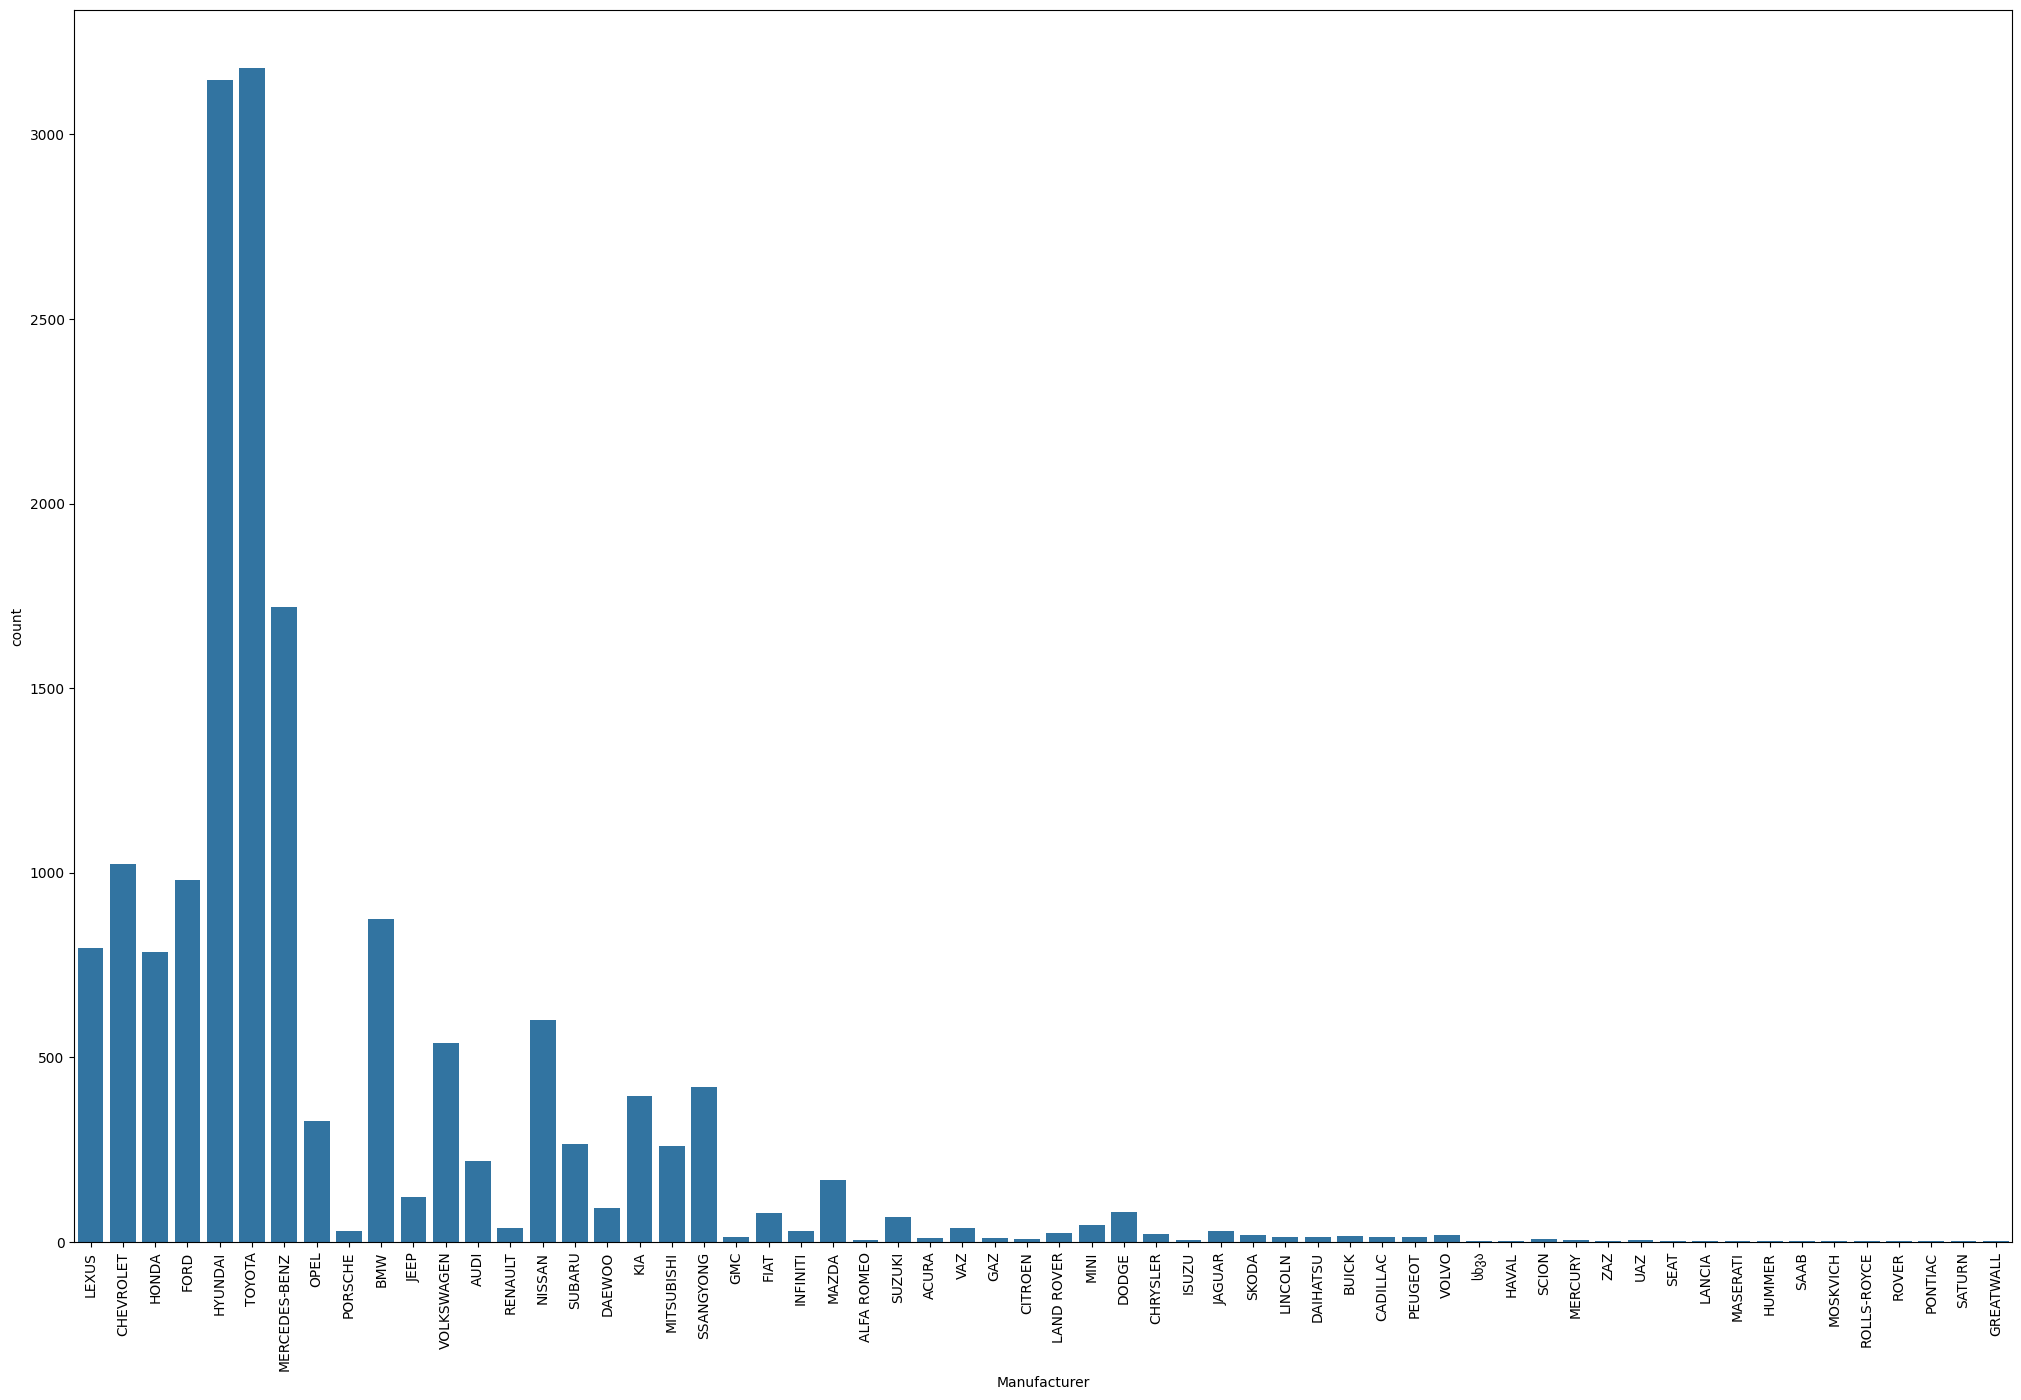

In [63]:
plt.figure(figsize=(25, 16))
sns.countplot(data=df, x='Manufacturer')
plt.xticks(rotation=90)
plt.show()

In [64]:
df['Manufacturer'].value_counts()

,count
Manufacturer,
TOYOTA,3179
HYUNDAI,3147
MERCEDES-BENZ,1721
CHEVROLET,1024
FORD,979
BMW,874
LEXUS,795
HONDA,786
NISSAN,602


As there are many categories (cardinality), lets group the values < 100 to others

In [65]:
# Set a frequency threshold — e.g., only keep manufacturers with >100 cars
threshold = 100
manufacturer_counts = df['Manufacturer'].value_counts()
common_manufacturers = manufacturer_counts[manufacturer_counts > threshold].index

df['Manufacturer'] = df['Manufacturer'].apply(lambda x: x if x in common_manufacturers else 'Other')

In [66]:
df['Manufacturer'].value_counts()

,count
Manufacturer,
TOYOTA,3179
HYUNDAI,3147
MERCEDES-BENZ,1721
CHEVROLET,1024
FORD,979
BMW,874
LEXUS,795
HONDA,786
Other,767


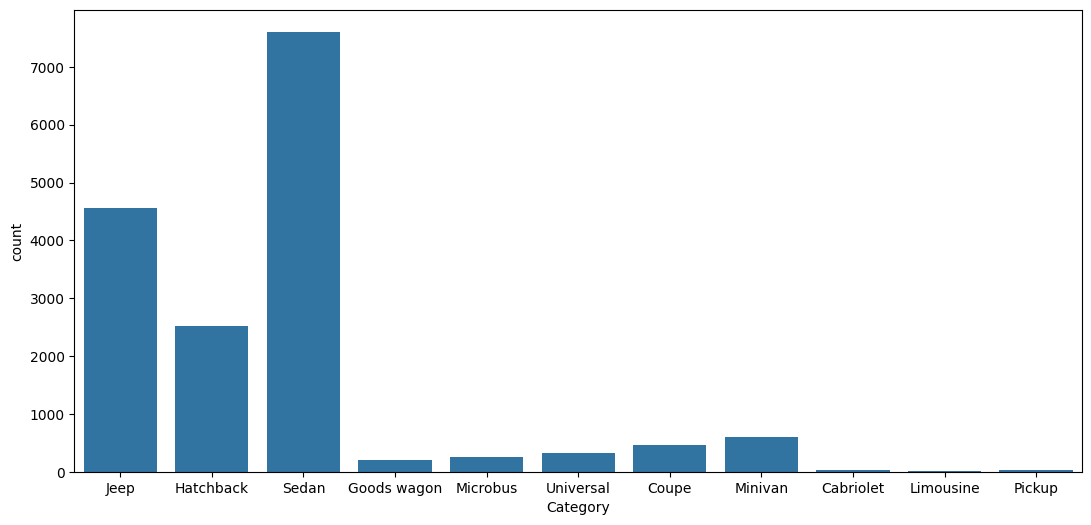

In [67]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='Category')
plt.show()

In [68]:
df['Category'].value_counts()

,count
Category,
Sedan,7608
Jeep,4556
Hatchback,2516
Minivan,599
Coupe,454
Universal,325
Microbus,246
Goods wagon,200
Pickup,37


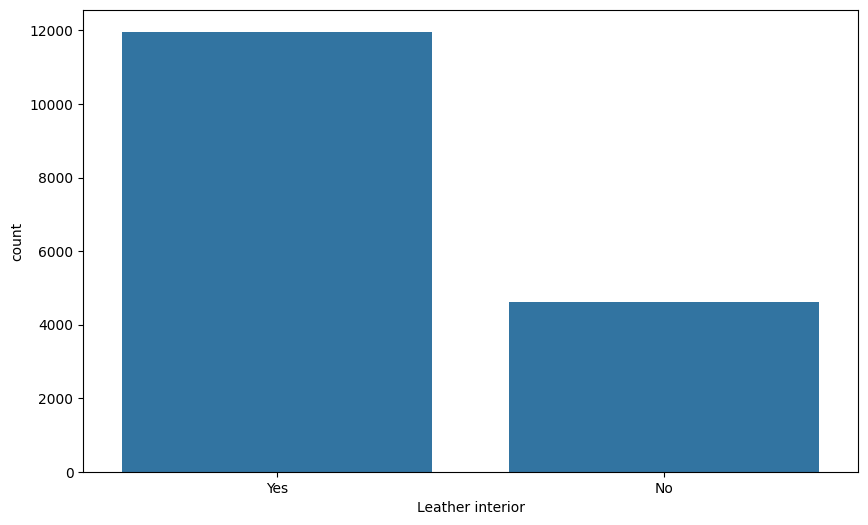

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Leather interior')
plt.show()

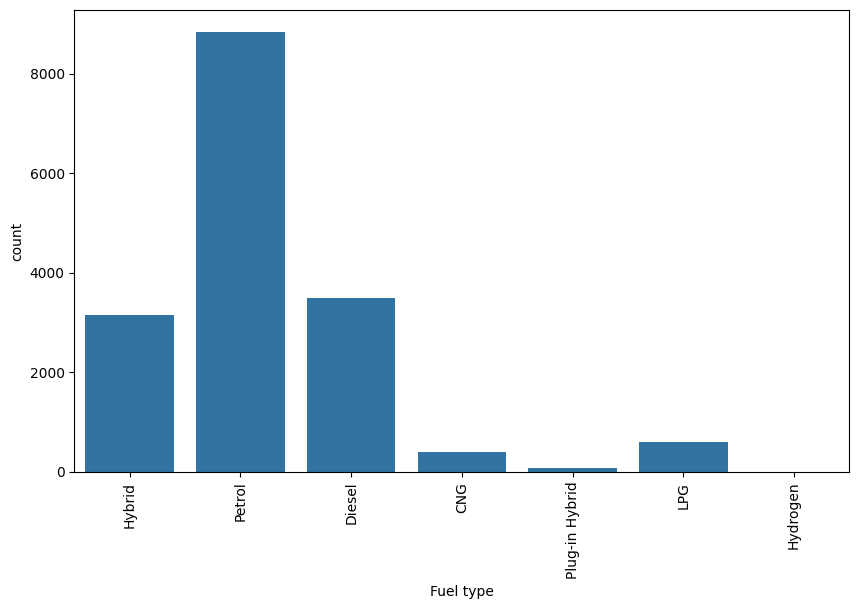

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fuel type')
plt.xticks(rotation=90)
plt.show()

In [71]:
df['Fuel type'].value_counts()

,count
Fuel type,
Petrol,8837
Diesel,3485
Hybrid,3158
LPG,610
CNG,410
Plug-in Hybrid,81
Hydrogen,1


In [72]:
# Set a frequency threshold
fuel_counts = df['Fuel type'].value_counts()
common_fuels = fuel_counts[fuel_counts > 500].index  # keep top frequent

# Replace rare types with "Other"
df['Fuel type'] = df['Fuel type'].apply(lambda x: x if x in common_fuels else 'Other')

In [73]:
df['Fuel type'].value_counts()

,count
Fuel type,
Petrol,8837
Diesel,3485
Hybrid,3158
LPG,610
Other,492


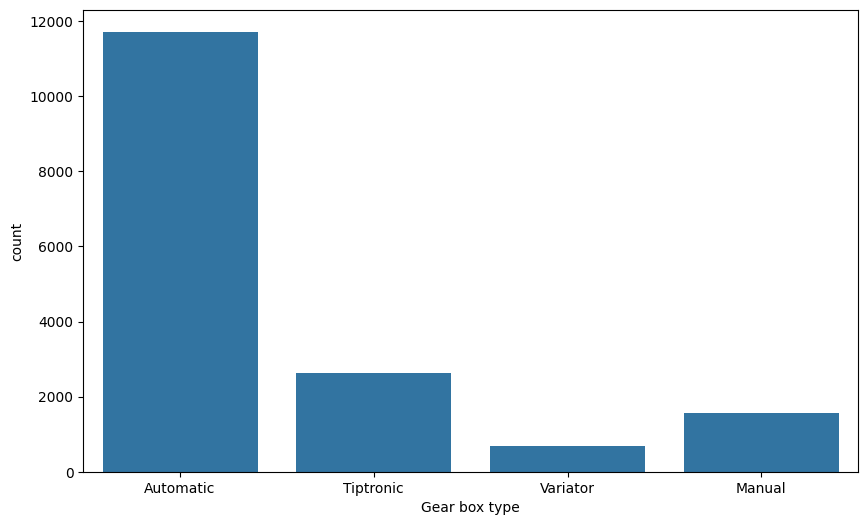

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gear box type')
plt.show()

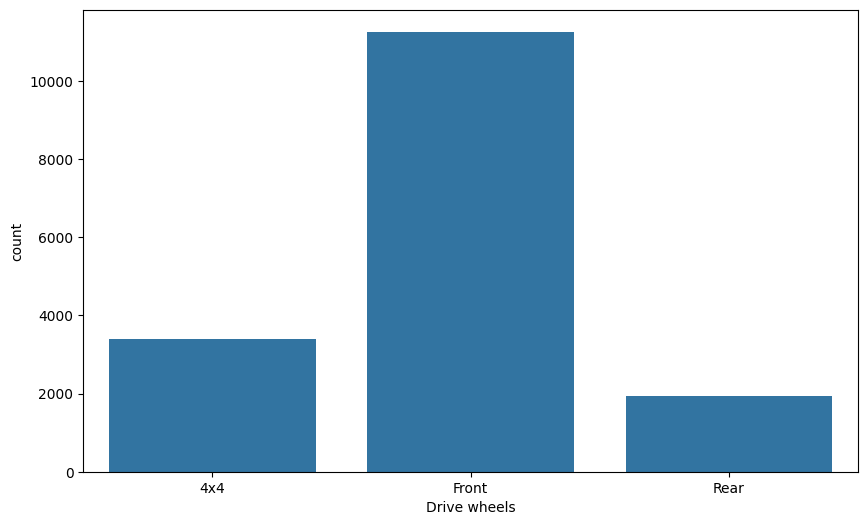

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Drive wheels')
plt.show()

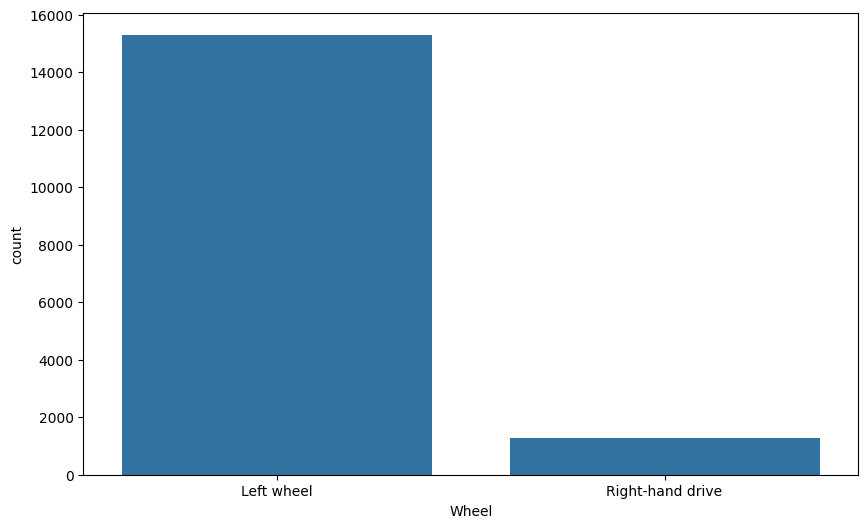

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Wheel')
plt.show()

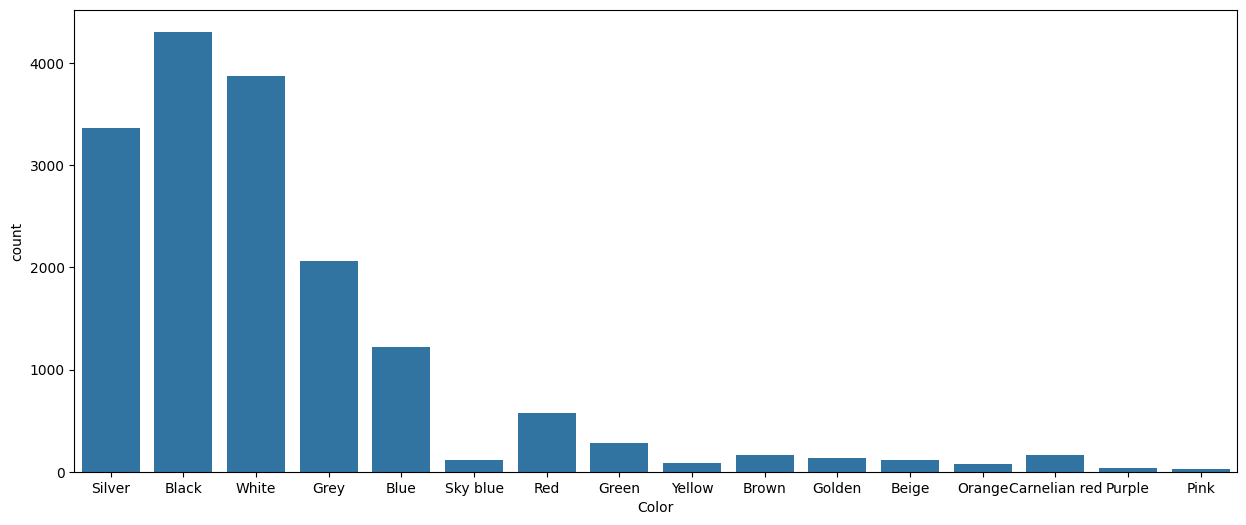

In [77]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Color')
plt.show()

In [78]:
df['Color'].value_counts()

,count
Color,
Black,4306
White,3875
Silver,3363
Grey,2059
Blue,1217
Red,571
Green,281
Brown,164
Carnelian red,160


In [79]:
# Set a frequency threshold
c_counts = df['Color'].value_counts()
c_fuels = c_counts[c_counts > 100].index  # keep top frequent

# Replace rare types with "Other"
df['Color'] = df['Color'].apply(lambda x: x if x in c_fuels else 'Other')

In [80]:
df['Color'].value_counts()

,count
Color,
Black,4306
White,3875
Silver,3363
Grey,2059
Blue,1217
Red,571
Green,281
Other,225
Brown,164


In [81]:
df.groupby('Color')['log_price'].mean().sort_values()

,log_price
Color,
Green,8.73
Black,8.90
Blue,8.93
Red,8.94
Brown,8.99
Grey,9.04
White,9.05
Silver,9.19
Other,9.27


In [82]:
df.drop(['Model'], inplace=True, axis=1)

In [83]:
df.describe(include='all')

,Manufacturer,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Age,log_price,log_price_bin,log_levy,log_engine_volume
count,16582,16582,16582,16582,16582.00,16582.00,16582,16582,16582,16582,16582,16582.00,16582.00,16582.00,16582,16582.00,16582.00
unique,19,11,2,5,NaN,NaN,4,3,3,2,13,NaN,NaN,NaN,3,NaN,NaN
top,TOYOTA,Sedan,Yes,Petrol,NaN,NaN,Automatic,Front,04-May,Left wheel,Black,NaN,NaN,NaN,High,NaN,NaN
freq,3179,7608,11966,8837,NaN,NaN,11719,11258,15809,15308,4306,NaN,NaN,NaN,5787,NaN,NaN
mean,NaN,NaN,NaN,NaN,137898.10,4.55,NaN,NaN,NaN,NaN,NaN,6.66,14.13,9.03,NaN,6.73,1.16
std,NaN,NaN,NaN,NaN,78240.96,1.16,NaN,NaN,NaN,NaN,NaN,4.31,5.41,1.39,NaN,0.40,0.23
min,NaN,NaN,NaN,NaN,13.00,1.00,NaN,NaN,NaN,NaN,NaN,0.00,5.00,4.37,NaN,4.48,0.00
25%,NaN,NaN,NaN,NaN,79000.00,4.00,NaN,NaN,NaN,NaN,NaN,4.00,11.00,8.64,NaN,6.47,1.03
50%,NaN,NaN,NaN,NaN,130000.00,4.00,NaN,NaN,NaN,NaN,NaN,6.00,13.00,9.49,NaN,6.66,1.10
75%,NaN,NaN,NaN,NaN,186449.50,4.00,NaN,NaN,NaN,NaN,NaN,12.00,16.00,9.95,NaN,6.96,1.25


## Anova F-Test

In [84]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ensure your target is continuous — e.g., log-transformed price
y = df['log_price']

# Select only categorical features
categorical_cols = df.select_dtypes(include='object').columns

# Encode categorical features (LabelEncoder works fine for ANOVA)
X = pd.DataFrame()
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Run ANOVA F-test
f_values, p_values = f_classif(X, y)

# Create results table
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
}).sort_values(by='P-Value')

print(anova_results)

            Feature  F-Value  P-Value
2  Leather interior     3.92     0.00
4     Gear box type     3.34     0.00
3         Fuel type     2.86     0.00
7             Wheel     2.38     0.00
0      Manufacturer     1.75     0.00
1          Category     1.72     0.00
8             Color     1.52     0.00
5      Drive wheels     1.08     0.01
6             Doors     0.85     1.00


| Feature          | F-Value | P-Value | Interpretation                                       |
| ---------------- | ------- | ------- | ---------------------------------------------------- |
| Leather interior | 3.92    | 0.00    | **Strong effect** on `log_price` ✅                   |
| Gear box type    | 3.34    | 0.00    | **Strong effect** ✅                                  |
| Fuel type        | 2.38    | 0.00    | **Moderate effect** ✅                                |
| Wheel            | 2.38    | 0.00    | **Moderate effect** ✅                                |
| Manufacturer     | 1.75    | 0.00    | **Moderate effect** ✅ *(despite high cardinality)*   |
| Category         | 1.72    | 0.00    | **Moderate effect** ✅                                |
| Color            | 1.54    | 0.00    | **Slight effect** ✅ *(still significant)*            |
| Drive wheels     | 1.08    | 0.01    | **Weak effect**, but **statistically significant** ✅ |
| Doors            | 0.85    | 1.00    | ❌ **Not significant** – no effect                    |


In [85]:
df.drop(['Doors'], inplace=True, axis=1)

As doors column has no effect, drop it

In [86]:
df.describe(include='all')

,Manufacturer,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Car Age,log_price,log_price_bin,log_levy,log_engine_volume
count,16582,16582,16582,16582,16582.00,16582.00,16582,16582,16582,16582,16582.00,16582.00,16582.00,16582,16582.00,16582.00
unique,19,11,2,5,NaN,NaN,4,3,2,13,NaN,NaN,NaN,3,NaN,NaN
top,TOYOTA,Sedan,Yes,Petrol,NaN,NaN,Automatic,Front,Left wheel,Black,NaN,NaN,NaN,High,NaN,NaN
freq,3179,7608,11966,8837,NaN,NaN,11719,11258,15308,4306,NaN,NaN,NaN,5787,NaN,NaN
mean,NaN,NaN,NaN,NaN,137898.10,4.55,NaN,NaN,NaN,NaN,6.66,14.13,9.03,NaN,6.73,1.16
std,NaN,NaN,NaN,NaN,78240.96,1.16,NaN,NaN,NaN,NaN,4.31,5.41,1.39,NaN,0.40,0.23
min,NaN,NaN,NaN,NaN,13.00,1.00,NaN,NaN,NaN,NaN,0.00,5.00,4.37,NaN,4.48,0.00
25%,NaN,NaN,NaN,NaN,79000.00,4.00,NaN,NaN,NaN,NaN,4.00,11.00,8.64,NaN,6.47,1.03
50%,NaN,NaN,NaN,NaN,130000.00,4.00,NaN,NaN,NaN,NaN,6.00,13.00,9.49,NaN,6.66,1.10
75%,NaN,NaN,NaN,NaN,186449.50,4.00,NaN,NaN,NaN,NaN,12.00,16.00,9.95,NaN,6.96,1.25


## Encoding (Label & One-Hot encode)

In [87]:
from sklearn.preprocessing import LabelEncoder

# Label encode high-cardinality features
label_cols = ['Manufacturer', 'Category', 'Color']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Binary mappings
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})
df['Wheel'] = df['Wheel'].map({'Left wheel': 0, 'Right-hand drive': 1})

# One-hot encode low-cardinality categorical features
one_hot_cols = ['Fuel type', 'Gear box type', 'Drive wheels']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [88]:
df.head()

,Manufacturer,Category,Leather interior,Mileage,Cylinders,Wheel,Color,Airbags,Car Age,log_price,...,log_engine_volume,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Other,Fuel type_Petrol,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
0,8,4,1,186005.00,6.00,0,10,12,15,9.50,...,1.50,True,False,False,False,False,False,False,False,False
1,2,4,0,192000.00,6.00,0,1,8,14,9.72,...,1.39,False,False,False,True,False,True,False,False,False
2,4,3,0,200000.00,4.00,1,1,2,19,9.04,...,0.83,False,False,False,True,False,False,True,True,False
3,3,4,1,168966.00,4.00,0,12,0,14,8.19,...,1.25,True,False,False,False,False,False,False,False,False
4,4,3,1,91901.00,4.00,0,10,4,11,9.37,...,0.83,False,False,False,True,False,False,False,True,False


In [89]:
df.shape

(16582, 22)

In [90]:
df.describe(include='all')

,Manufacturer,Category,Leather interior,Mileage,Cylinders,Wheel,Color,Airbags,Car Age,log_price,...,log_engine_volume,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Other,Fuel type_Petrol,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
count,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,16582.00,...,16582.00,16582,16582,16582,16582,16582,16582,16582,16582,16582
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,False,True,False,False,False,True,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13424,15972,16090,8837,15030,13948,15905,11258,14654
mean,9.20,6.29,0.72,137898.10,4.55,0.08,6.81,6.66,14.13,9.03,...,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.70,2.79,0.45,78240.96,1.16,0.27,4.44,4.31,5.41,1.39,...,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00,0.00,0.00,13.00,1.00,0.00,0.00,0.00,5.00,4.37,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.00,4.00,0.00,79000.00,4.00,0.00,1.00,4.00,11.00,8.64,...,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8.00,7.00,1.00,130000.00,4.00,0.00,7.00,6.00,13.00,9.49,...,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,15.00,9.00,1.00,186449.50,4.00,0.00,10.00,12.00,16.00,9.95,...,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df.columns

Index(['Manufacturer', 'Category', 'Leather interior', 'Mileage', 'Cylinders',
       'Wheel', 'Color', 'Airbags', 'Car Age', 'log_price', 'log_price_bin',
       'log_levy', 'log_engine_volume', 'Fuel type_Hybrid', 'Fuel type_LPG',
       'Fuel type_Other', 'Fuel type_Petrol', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear'],
      dtype='object')

## Model Building

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

In [96]:
# ------------------ Data Splitting ------------------
X = df.drop(['log_price', 'log_price_bin'], axis=1)
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# ------------------ Models ------------------
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42)
}

In [98]:
# ------------------ Evaluation ------------------
print("Model Evaluation:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Metrics in log scale
    rmse_log = np.sqrt(mean_squared_error(y_test, preds))
    r2_log = r2_score(y_test, preds)

    # Metrics in original scale
    y_test_orig = np.expm1(y_test)
    preds_orig = np.expm1(preds)
    rmse = np.sqrt(mean_squared_error(y_test_orig, preds_orig))
    r2 = r2_score(y_test_orig, preds_orig)

    print(f"{name}:")
    print(f"  Log scale     -> RMSE = {rmse_log:.2f}, R² = {r2_log:.3f}")
    print(f"  Original scale-> RMSE = {rmse:.2f}, R² = {r2:.3f}\n")

Model Evaluation:

Linear Regression:
  Log scale     -> RMSE = 1.20, R² = 0.236
  Original scale-> RMSE = 12099.96, R² = -0.049

Random Forest:
  Log scale     -> RMSE = 0.74, R² = 0.707
  Original scale-> RMSE = 6903.33, R² = 0.659

XGBoost:
  Log scale     -> RMSE = 0.79, R² = 0.667
  Original scale-> RMSE = 8185.67, R² = 0.520

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 13265, number of used features: 20
[LightGBM] [Info] Start training from score 9.025532
LightGBM:
  Log scale     -> RMSE = 0.82, R² = 0.639
  Original scale-> RMSE = 7790.69, R² = 0.565



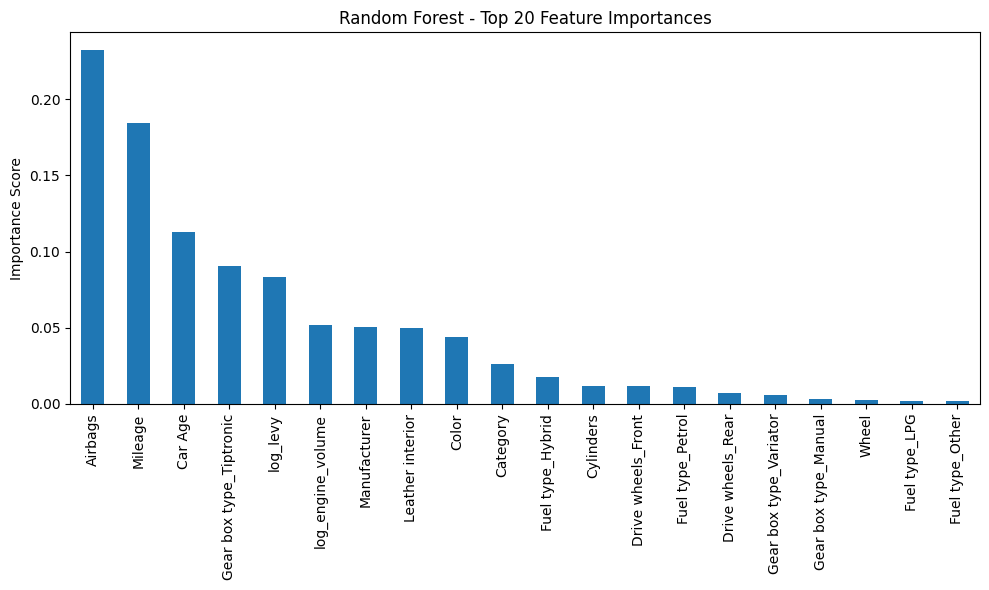

In [99]:
# ------------------ Feature Importance: Random Forest ------------------
rf_model = models['Random Forest']
rf_model.fit(X_train, y_train)
rf_features = pd.Series(rf_model.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 6))
rf_features.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title("Random Forest - Top 20 Feature Importances")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 13265, number of used features: 20
[LightGBM] [Info] Start training from score 9.025532


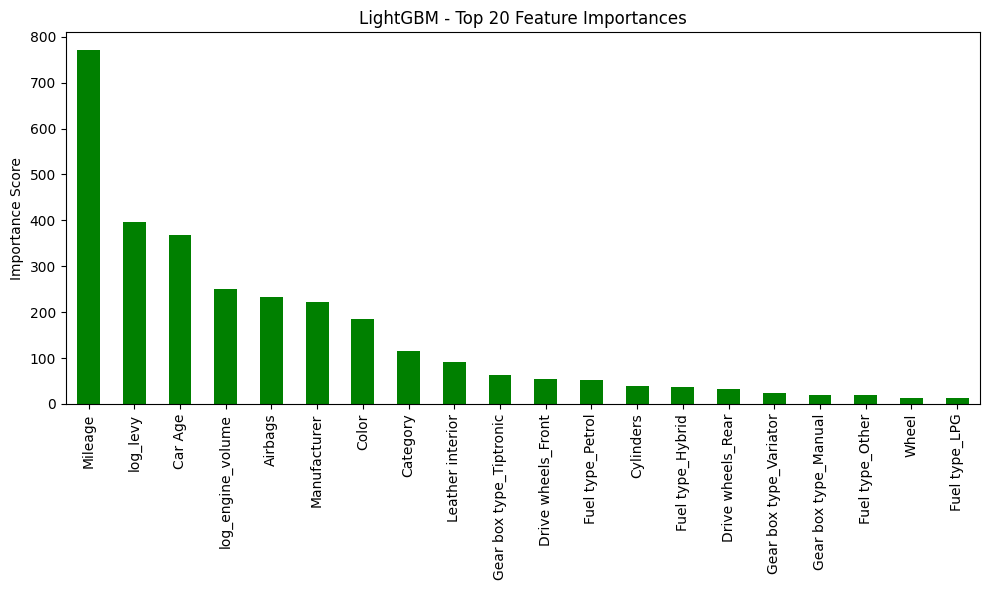

In [100]:
# ------------------ Feature Importance: LightGBM ------------------
lgb_model = models['LightGBM']
lgb_model.fit(X_train, y_train)
lgb_features = pd.Series(lgb_model.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 6))
lgb_features.sort_values(ascending=False).head(20).plot(kind='bar', color='green')
plt.title("LightGBM - Top 20 Feature Importances")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [101]:
# ------------------ Hyperparameter Tuning: Random Forest ------------------
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']  # removed 'auto'
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train, y_train)

# Evaluate tuned model
best_rf = random_search_rf.best_estimator_
print("Best RF Parameters:", random_search_rf.best_params_)

preds = best_rf.predict(X_test)
y_test_orig = np.expm1(y_test)
preds_orig = np.expm1(preds)

rmse = np.sqrt(mean_squared_error(y_test_orig, preds_orig))
r2 = r2_score(y_test_orig, preds_orig)

print("\nTuned Random Forest:")
print(f"  Original scale -> RMSE = {rmse:.2f}, R² = {r2:.3f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best RF Parameters: {'max_depth': np.int64(20), 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 466}

Tuned Random Forest:
  Original scale -> RMSE = 7193.86, R² = 0.629


In [103]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid_lgb = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'min_child_samples': [10, 20, 30]
}

# Initialize model
lgb = LGBMRegressor(random_state=42)

# GridSearchCV
grid_search_lgb = GridSearchCV(
    estimator=lgb,
    param_grid=param_grid_lgb,
    cv=5,
    scoring='neg_root_mean_squared_error',  # suitable for RMSE
    verbose=2,
    n_jobs=-1
)

# Fit
grid_search_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 13265, number of used features: 20
[LightGBM] [Info] Start training from score 9.025532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [5, 10, 15],
                         'min_child_samples': [10, 20, 30],
                         'n_estimators': [100, 300, 500],
                         'num_leaves': [31, 50, 100]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [104]:
# Get the best estimator
best_lgb = grid_search_lgb.best_estimator_
print("Best LightGBM Parameters:", grid_search_lgb.best_params_)

# Predict
preds_log = best_lgb.predict(X_test)

# Log scale metrics
rmse_log = np.sqrt(mean_squared_error(y_test, preds_log))
r2_log = r2_score(y_test, preds_log)

# Original scale metrics
y_test_orig = np.expm1(y_test)
preds_orig = np.expm1(preds_log)
rmse = np.sqrt(mean_squared_error(y_test_orig, preds_orig))
r2 = r2_score(y_test_orig, preds_orig)

print("Tuned LightGBM:")
print(f"  Log scale     -> RMSE = {rmse_log:.2f}, R² = {r2_log:.3f}")
print(f"  Original scale-> RMSE = {rmse:.2f}, R² = {r2:.3f}")

Best LightGBM Parameters: {'learning_rate': 0.05, 'max_depth': 15, 'min_child_samples': 10, 'n_estimators': 500, 'num_leaves': 100}
Tuned LightGBM:
  Log scale     -> RMSE = 0.75, R² = 0.698
  Original scale-> RMSE = 7047.04, R² = 0.644


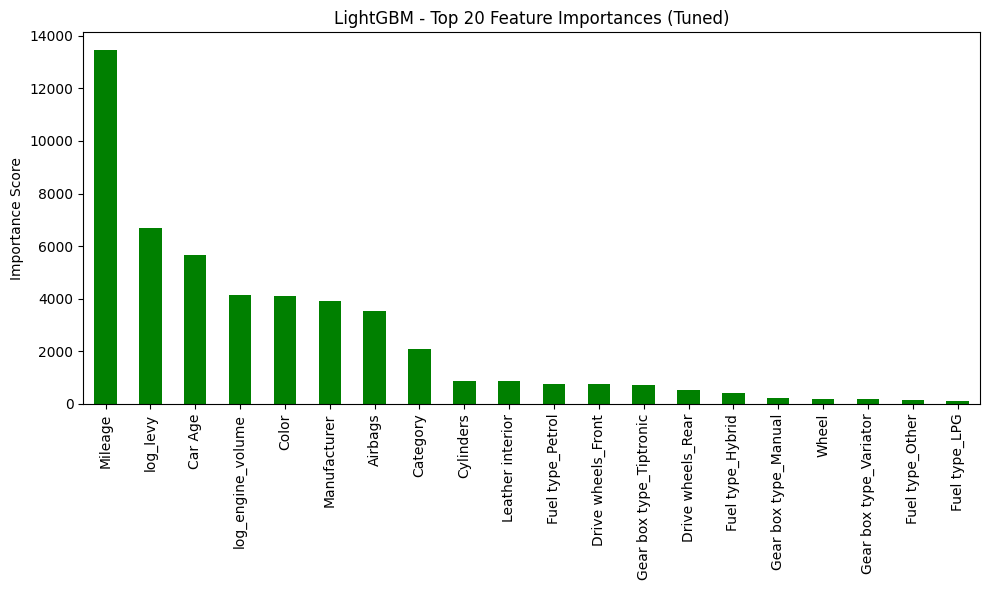

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

lgb_importances = best_lgb.feature_importances_
lgb_features = pd.Series(lgb_importances, index=X_train.columns)

plt.figure(figsize=(10, 6))
lgb_features.sort_values(ascending=False).head(20).plot(kind='bar', color='green')
plt.title("LightGBM - Top 20 Feature Importances (Tuned)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

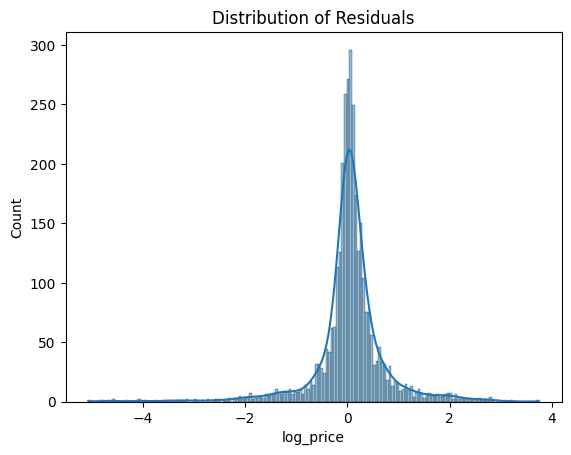

In [106]:
import seaborn as sns

residuals = y_test - preds  # or np.expm1(y_test) - np.expm1(preds) if original scale
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()


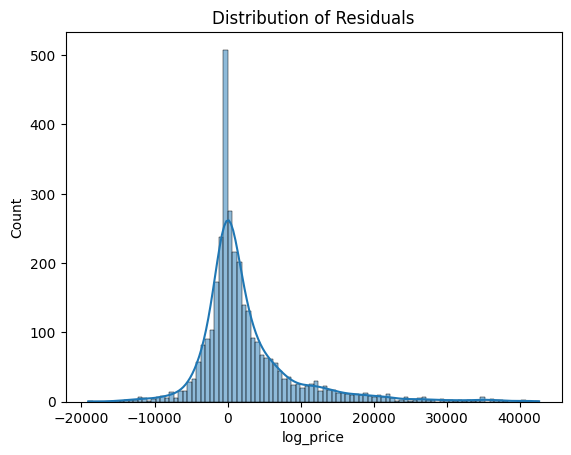

In [107]:
import seaborn as sns

residuals = np.expm1(y_test) - np.expm1(preds)  # or np.expm1(y_test) - np.expm1(preds) if original scale
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()